# THỰC HÀNH 2: ẢNH KỸ THUẬT SỐ & MÀU
### 1. VIẾT CHƯƠNG TRÌNH XỬ LÝ ĐIỂM ẢNH
#### 1.1. Biến đổi cường độ ảnh (Image inverse transformation)


In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh và chuyển sang ảnh xám
img = Image.open('bird.png').convert('L')
#Chuyển ảnh thành mảng
im_1 = np.asarray(img)
#Thực hiện phép biến đổi 
im_2 = 255 - im_1
# Chuyển mảng numpy thành ảnh
print(im_2)
new_img =Image.fromarray(im_2)
img.show()
plt.imshow(new_img, cmap='gray')
plt.show()

#### 1.2. Thay đổi chất lượng ảnh với Power law (Gamma-Correction)


In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh và chuyển sang ảnh xám
img =Image.open('bird.png').convert('L')
#đảo ánh dạng 'L' sang 1 mảng số (matrix)
im_1 = np.asarray(img)

#gamma =5 (theo yêu cầu đề bài)
gamma = 5
# chuyển matrix từ số nguyên sang số thực 
b1 = im_1.astype(float)
#tìm giá trị lớn nhất trong b1
b2=np.max(b1)
#chuẩn hóa b1 (tức là chuyển các giá trị b1 vê thuộc khoảng [0,1])
b3 = (b1+1)/b2
#tính tương quan hàm mũ gamma
b2 = np.log(b3)*gamma
#tính tương quan gamma và quy về khoảng [0,1]
c= np.exp (b2) * 255.0
#chuyển c về số nguyên
c1 = c.astype(int)
print(c1)
d = Image.fromarray(c1)
img.show ()
d.show ()
plt.imshow(d, cmap='gray')
plt.show()


#### 1.3. Thay đổi cường độ điểm ảnh với Log Transformation

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#Mở ảnh và chuyển sang ảnh xám
img = Image.open('bird.png').convert('L')
#đảo ảnh dạng 'L' sang 1 mảng số (matrix)
im_1 = np.asarray(img)
#chuyển matrix từ số nguyên sang số thực 
b1 = im_1.astype (float)
#tìm giá trị lớn nhất trong b1
b2 = np.max (b1)
#biến đổi log
c = (128.0 * np.log(1 + b1))/np.log (1 + b2)

#chuyển c về số nguyên
cl = c.astype (int)
print(c1)
d = Image.fromarray (cl)
img.show ()
d.show ()
plt.imshow (d, cmap='gray')
plt.show ()


#### 1.4. Histogram equalization


In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#mở ảnh trắng đen
img = Image.open('bird.png').convert('L')
# chuyển ảnh thành mảng ndarray
im1 = np.asarray(img)
# chuyển mảng 2D thành 1D
bl = im1.flatten()
# tính histogram và bins
hist, bins = np.histogram(im1, 256, [0, 255])
# tính hàm phân phối tích lũy (CDF)
cdf = hist.cumsum()
# loại bỏ các giá trị bằng 0 trong cdf
cdf_m = np.ma.masked_equal (cdf, 0)
# thực hiện cân bằng lược đồ
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max () - cdf_m.min ())
cdf_m = num_cdf_m/den_cdf_m
# gán giá trị 0 cho các vị trí bị che trong cdf
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
# gán các giá trị mới vào mảng 1D
im2 = cdf [bl]
# chuyển mảng 1D về 2D
im3 = np.reshape (im2, im1.shape)
# tạo ảnh mới từ mảng đã xử lý
im4 = Image.fromarray (im3)
img.show ()
im4.show ()
plt.imshow (im4, cmap='gray')
plt.show ()


#### 1.5. Thay đổi ảnh với Contrast Stretching


In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
# Mở ảnh và chuyển sang ảnh trắng đen
img = Image.open('bird.png').convert ('L')
# Chuyển ảnh thành mảng numpy 2D
iml = np.asarray(img)
# Tìm giá trị pixel lớn nhất và nhỏ nhất
b = iml.max ()
a = iml.min()
print (a, b)
# Chuyển mảng sang kiểu float để tính toán
C = iml.astype (float)
# Biến đổi giãn độ tương phản
im2 = 255* (c- a)/(b - a)

# Tạo ảnh từ mảng đã xử lý
im3 = Image.fromarray (im2)
print(im3)
img.show ()
im3.show ()
plt.imshow(im3, cmap='gray')
plt.show ()


#### 1.6. Biển đổi Fourier
##### 1.6.1. Biến đổi ảnh với Fast Fourier



In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
# Mở ảnh và chuyển sang ảnh xám
img = Image.open('bird.png').convert('L')
#Chuyển ảnh thành mảng numpy
iml = np.asarray (img)
# Thực hiện biến đổi fft
c= abs(scipy.fftpack.fft2 (iml))
# Dịch tâm tần số về giữa (center shift)
d= scipy.fftpack.fftshift (c)
d = d.astype (float)
#Tạo ảnh từ mảng đã xử lý
im3 = Image.fromarray (d)
print(im3)
img.show ()
im3.show()
plt.imshow (im3, cmap = 'gray')
plt.show ()


##### 1.6.2. Lọc ảnh trong miền tần suất
- Butterworth Lowpass Filter



In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# mở ảnh xám
img = Image.open('bird.png').convert('L')
# chuyển ảnh thành mảng numpy
iml = np.asarray(img)
# thực hiện biến đổi Fourier nhanh (FFT)
c = abs(scipy.fftpack.fft2(iml))
# dịch phổ Fourier về trung tâm
d = scipy.fftpack.fftshift(c)
# khởi tạo các biến cho hàm tích chập
M = d.shape[0]
N = d.shape[1]
# khởi tạo H và gán giá trị là 1
H = np.ones((M, N))
centerl = M / 2
center2 = N / 2
d_0 = 30.0 # bán kính cắt
t1 = 1 # bậc của bộ lọc Butterworth (BLPF)
t2 = 2 * t1
# định nghĩa hàm tích chập cho BLPF
for i in range(1, M):
    for j in range(1, N):
        rl = (i - centerl) ** 2 + (j - center2) ** 2
        # tính khoảng cách Euclid từ gốc tọa độ
        r = math.sqrt(rl)
        # sử dụng bán kính cắt để loại bỏ tần số cao
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0) ** t1)
# chuyển H từ ndarray sang ảnh
H = H.astype(float)
H = Image.fromarray(H)
# thực hiện tích chập
con = d * H
# tính biên độ của ảnh sau biến đổi Fourier ngược
e = abs(scipy.fftpack.ifft2(con))
# chuyển e từ ndarray sang ảnh
e = e.astype(float)
im3 = Image.fromarray(e)
print(im3)
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()


- Butterworth highpass Filter

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# mở ảnh xám
img = Image.open('bird.png').convert('L')
# chuyển ảnh thành mảng numpy
iml = np.asarray(img)
# thực hiện biến đổi Fourier nhanh (FFT)
c = abs(scipy.fftpack.fft2(iml))
# dịch phổ Fourier về trung tâm
d = scipy.fftpack.fftshift(c)
# khởi tạo các biến cho hàm tích chập
M = d.shape[0]
N = d.shape[1]
# H được định nghĩa và khởi tạo tất cả giá trị là 1
H = np.ones((M, N))
centerl = M / 2
center2 = N / 2
d_0 = 30.0  # bán kính cắt
t1 = 1      # bậc của bộ lọc 
t2 = 2 * t1
# định nghĩa hàm tích chập cho 
for i in range(1, M):
    for j in range(1, N):
        rl = (i - centerl) ** 2 + (j - center2) ** 2
        # tính khoảng cách Euclid từ gốc tọa độ
        r = math.sqrt(rl)
        # sử dụng bán kính cắt để loại bỏ tần số cao
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0) ** t2)
# chuyển H từ ndarray sang ảnh
H = H.astype(float)
H = Image.fromarray(H)
# thực hiện phép tích chập
con = d * H
# tính biên độ của ảnh sau biến đổi Fourier ngược
e = abs(scipy.fftpack.ifft2(con))
# chuyển e từ ndarray sang ảnh
e = e.astype(float)
im3 = Image.fromarray(e)
print(im3)
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()


#### 1. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:
- Image inverse transformation
- Gamma-Correction
- Log Transformation
- Histogram equalization
- Contrast Stretching
Khi người dùng ấn phím I, G, L, H, C thì chương trình sẽ thực hiện hàm tương ứng cho các
hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.

In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

def Image_inverse_transformation(im_1):
    return 255 - im_1

def Gamma_Correction(im_1, gamma=0.5):
    # Chuẩn hóa ảnh về [0,1]
    normalized = im_1 / 255.0
    corrected = np.power(normalized, gamma)
    return np.clip(corrected * 255, 0, 255).astype(np.uint8)


def Log_Transformation(im_1):
    # Đổi kiểu dữ liệu để tính toán chính xác hơn
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    # Công thức log transform chuẩn hóa về 128
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    return np.clip(c, 0, 255).astype(np.uint8)

def Histogram_equalization(im_1):
    flat = im_1.flatten()
    hist, _ = np.histogram(flat, 256, [0, 255])
    # Tính hàm phân phối tích lũy (CDF)
    cdf = hist.cumsum()
    # Bỏ qua giá trị bằng 0 để tránh chia cho 0
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    # Lấp lại phần bị che (mask) bằng 0
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized = cdf[flat]
    return np.reshape(equalized, im_1.shape)

def Contrast_Stretching(im_1):
    a = im_1.min()
    b = im_1.max()
    # Công thức giãn tương phản chuẩn hóa về [0,255]
    stretched = 255 * (im_1 - a) / (b - a)
    return np.clip(stretched, 0, 255).astype(np.uint8)

def apply_transformation(transformation_func, method_name):
    input_folder = "exercise"
    output_folder = "output"
    os.makedirs(output_folder, exist_ok=True)
 # Lọc ra 3 file ảnh đầu tiên có đuôi png/jpg/jpeg trong thư mục "exercise"
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))][:3]
    processed_images = []
    for file_name in image_files:
        img_path = os.path.join(input_folder, file_name)
        img = Image.open(img_path).convert("L")
        im_np = np.asarray(img)
        # Áp dụng biến đổi
        processed_np = transformation_func(im_np)
        processed_img = Image.fromarray(processed_np)

        output_path = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}_{method_name}.png")
        processed_img.save(output_path)

        processed_images.append((processed_img, file_name))

    # Hiển thị ảnh
    fig, axes = plt.subplots(1, len(processed_images), figsize=(15, 5))
     # Trường hợp chỉ có 1 ảnh, ép axes thành list để duyệt được
    if len(processed_images) == 1:
        axes = [axes]
    for ax, (image, fname) in zip(axes, processed_images):
        ax.imshow(image, cmap='gray')
        ax.set_title(fname)
        ax.axis('off')
    plt.suptitle(f"Kết quả: {method_name}")
    plt.show()

def menu():
    print("=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===")
    print("\tI. Image inverse transformation")
    print("\tG. Gamma Correction")
    print("\tL. Log Transformation")
    print("\tH. Histogram Equalization")
    print("\tC. Contrast Stretching")
    print("\tE. Thoát")

    luachon = input("Nhập lựa chọn của bạn: ").upper()
    match luachon:
        case 'I':
            apply_transformation(Image_inverse_transformation, "Inverse")
        case 'G':
            apply_transformation(Gamma_Correction, "Gamma")
        case 'L':
            apply_transformation(Log_Transformation, "Log")
        case 'H':
            apply_transformation(Histogram_equalization, "Histogram_Eq")
        case 'C':
            apply_transformation(Contrast_Stretching, "Contrast")
        case 'E':
            print("Tạm biệt!")
        case _:
            print("Lựa chọn không hợp lệ!")

menu()


#### 2. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:
- Fast Fourier
- Butterworth Lowpass Filter
- Butterworth Highpass Filter
Khi người dùng ấn phím F, L, H thì chương trình sẽ thực hiện hàm tương ứng cho các hình
trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.

=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===
	F. Fast Fourier
	L. Butterworth Lowpass Filter
	H. Butterworth Highpass Filter
	E. Thoát


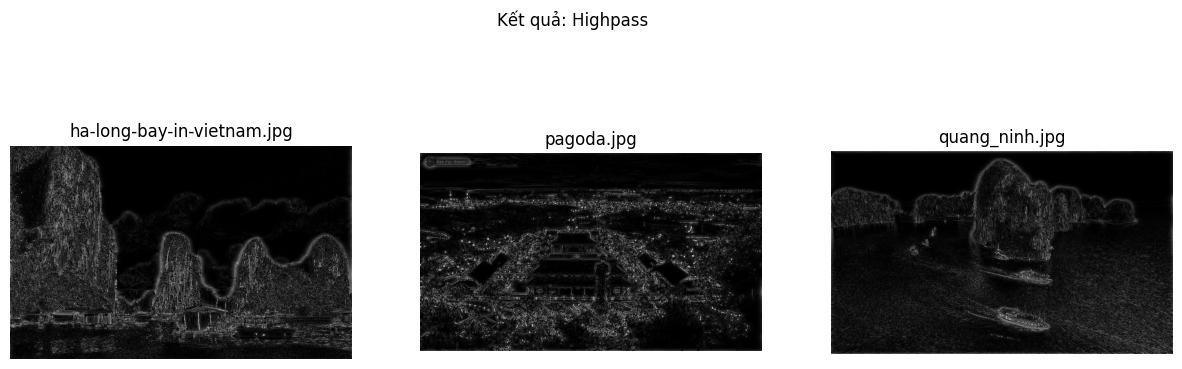

=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===
	F. Fast Fourier
	L. Butterworth Lowpass Filter
	H. Butterworth Highpass Filter
	E. Thoát
Tạm biệt!


In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import math

def Fast_Fourier(im_1):
    # Dịch tâm tần số về giữa (center shift)
    c = abs(scipy.fftpack.fft2(im_1))
    d = scipy.fftpack.fftshift(c)
    d = np.log(1 + d)  # log để nhìn rõ phổ tần số hơn
    d = (d - np.min(d)) / (np.max(d) - np.min(d)) * 255 # Chuẩn hóa ảnh về [0,255]
    return d.astype(np.uint8)

def Butterworth_Lowpass_Filter(im_1):
    # thực hiện biến đổi Fourier nhanh (FFT)
    c = scipy.fftpack.fft2(im_1)
    # dịch phổ Fourier về trung tâm
    d = scipy.fftpack.fftshift(c)
    # khởi tạo các biến cho hàm tích chập
    M, N = d.shape
    H = np.ones((M, N))
    center1 = M / 2
    center2 = N / 2
    d_0 = 30.0  # bán kính cắt
    t1 = 1 # bậc của bộ lọc 
# định nghĩa hàm tích chập 
    for i in range(M):
        for j in range(N):
            # tính khoảng cách Euclid từ gốc tọa độ
            r = math.sqrt((i - center1) ** 2 + (j - center2) ** 2)
            # sử dụng bán kính cắt để loại bỏ tần số cao
            H[i, j] = 1 / (1 + (r / d_0) ** (2 * t1)) 
# thực hiện tích chập
    con = d * H
    # tính biên độ của ảnh sau biến đổi Fourier ngược
    e = abs(scipy.fftpack.ifft2(scipy.fftpack.ifftshift(con)))
    e = (e - np.min(e)) / (np.max(e) - np.min(e)) * 255
    return e.astype(np.uint8)
    
def Butterworth_Highpass_Filter(im_1):
    # thực hiện biến đổi Fourier nhanh (FFT)
    c = scipy.fftpack.fft2(im_1)
    # dịch phổ Fourier về trung tâm
    d = scipy.fftpack.fftshift(c)
    # khởi tạo các biến cho hàm tích chập
    M, N = d.shape
    H = np.ones((M, N))
    center1 = M / 2
    center2 = N / 2
    d_0 = 30.0 # bán kính cắt
    t1 = 1 # bậc của bộ lọc

    # định nghĩa hàm tích chập
    for i in range(M):
        for j in range(N):
            # tính khoảng cách Euclid từ gốc tọa độ
            r = math.sqrt((i - center1) ** 2 + (j - center2) ** 2)
            # sử dụng bán kính cắt để loại bỏ tần số thấp
            H[i, j] = 1 - 1 / (1 + (r / d_0) ** (2 * t1))

    # thực hiện tích chập
    con = d * H
    # tính biên độ của ảnh sau biến đổi Fourier ngược
    e = abs(scipy.fftpack.ifft2(scipy.fftpack.ifftshift(con)))
    e = (e - np.min(e)) / (np.max(e) - np.min(e)) * 255
    return e.astype(np.uint8)


def apply_transformation(transformation_func, method_name):
    input_folder = "exercise"
    output_folder = "output_2"
    os.makedirs(output_folder, exist_ok=True)
# Lọc ra 3 file ảnh đầu tiên có đuôi png/jpg/jpeg trong thư mục "exercise"
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))][:3]
    processed_images = []
# Áp dụng biến đổi
    for file_name in image_files:
        img_path = os.path.join(input_folder, file_name)
        img = Image.open(img_path).convert("L")
        im_np = np.asarray(img)

        processed_np = transformation_func(im_np)
        processed_img = Image.fromarray(processed_np)
# lưu ảnh
        output_path = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}_{method_name}.png")
        processed_img.save(output_path)

        processed_images.append((processed_img, file_name))
 # Hiển thị ảnh
    fig, axes = plt.subplots(1, len(processed_images), figsize=(15, 5))
 # Trường hợp chỉ có 1 ảnh, ép axes thành list để duyệt được
    if len(processed_images) == 1:
        axes = [axes]
    for ax, (image, fname) in zip(axes, processed_images):
        ax.imshow(image, cmap='gray')
        ax.set_title(fname)
        ax.axis('off')
    plt.suptitle(f"Kết quả: {method_name}")
    plt.show()

def menu():
    while True:
        print("=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===")
        print("\tF. Fast Fourier")
        print("\tL. Butterworth Lowpass Filter")
        print("\tH. Butterworth Highpass Filter")
        print("\tE. Thoát")

        luachon = input("Nhập lựa chọn của bạn: ").upper()
        match luachon:
            case 'F':
                apply_transformation(Fast_Fourier, "Fast")
            case 'L':
                apply_transformation(Butterworth_Lowpass_Filter, "Lowpass")
            case 'H':
                apply_transformation(Butterworth_Highpass_Filter, "Highpass")
            case 'E':
                print("Tạm biệt!")
                break
            case _:
                print("Lựa chọn không hợp lệ!")

menu()


#### 3. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 1. Lưu và hiển thị ảnh đã biến đổi.


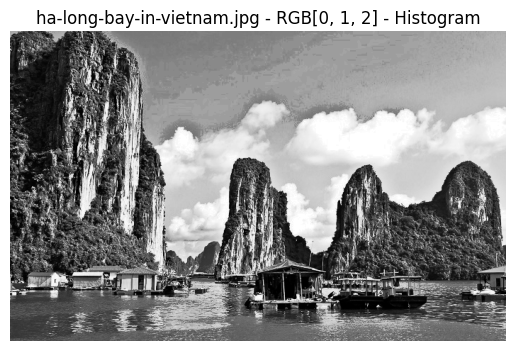

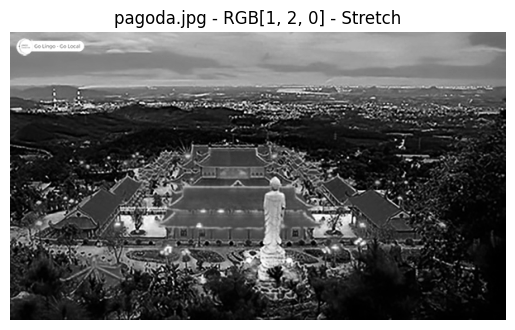

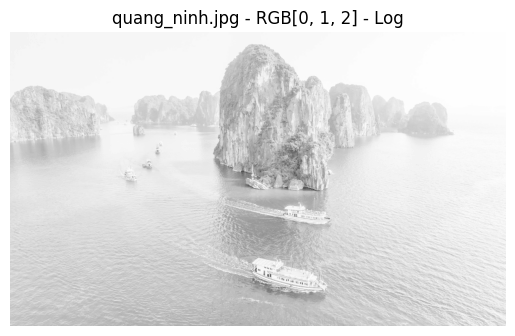

In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# các phương pháp biến đổi ảnh

# phương pháp biến đổi cường độ ảnh
def Image_inverse_transformation(im_1):
    return 255 - im_1

# pp thay đổi chất lượng ảnh với Power Law
def Gamma_Correction(im_1, gamma=0.5):
    im_1 = np.asarray(im_1, dtype=np.float32) / 255.0
    corrected = np.power(im_1, gamma)
    return np.clip(corrected * 255, 0, 255).astype(np.uint8)\
    
# Pp thay đổi cường độ ảnh với log transformation
def Log_Transformation(im_1):
    # Chuyển kiểu dữ liệu sang float để tính toán log chính xác
    b1 = im_1.astype(np.float32)
    b2 = np.max(b1)
    # Nếu toàn ảnh đều là 0, trả về ảnh đen
    if b2 == 0:
        return np.zeros_like(im_1, dtype=np.uint8)
    # dùng log(1 + b1) để tránh log(0) gây lỗi 
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2) 
    return np.clip(c, 0, 255).astype(np.uint8)

# Pp Histogram equalization
def Histogram_equalization(im_1):
    flat = im_1.flatten()
    # Tính histogram 
    hist, _ = np.histogram(flat, 256, [0, 256])
    # Tính hàm phân phối tích lũy (CDF)
    cdf = hist.cumsum()
    # Bỏ qua các giá trị bằng 0 để tránh chia 0
    cdf_m = np.ma.masked_equal(cdf, 0)
    # Chuẩn hóa CDF về khoảng [0, 255]
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    # Gán lại các giá trị đã bỏ qua bằng 0
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    # Tra bảng ánh xạ để thay pixel cũ bằng pixel mới
    equalized = cdf[flat]
    return np.reshape(equalized, im_1.shape)

# Pp Contrast Stretching
def Contrast_Stretching(im_1):
    a = np.min(im_1)
    b = np.max(im_1)
    if a == b:
        return np.zeros_like(im_1, dtype=np.uint8)
 # Kéo dãn về khoảng [0, 255]
    stretched = 255.0 * (im_1 - a) / (b - a)
    return np.clip(stretched, 0, 255).astype(np.uint8)

# Danh sách hàm xử lý xám
gray_transforms = [
    ("Negative", Image_inverse_transformation),
    ("Log", Log_Transformation),
    ("Gamma", lambda img: Gamma_Correction(img, gamma=0.5)), #gán gamma = 0.5
    ("Histogram", Histogram_equalization),
    ("Stretch", Contrast_Stretching)
]

#  Hàm đổi thứ tự màu RGB 
def shuffle_rgb(img_rgb):
    img_np = np.array(img_rgb)
    channels = [0, 1, 2] # chỉ số của kênh R, G, B
    random.shuffle(channels)  # trộn ngẫu nhiên thứ tự
    shuffled = img_np[:, :, channels]
    return Image.fromarray(shuffled), channels

#  Hàm chính 
def random_color_and_gray_transform():
    input_folder = "exercise"
    output_folder = "output_3"
    os.makedirs(output_folder, exist_ok=True)

    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
    if not image_files:
        print("Không tìm thấy ảnh trong thư mục 'exercise'")
        return

    for file_name in image_files:
        img_path = os.path.join(input_folder, file_name)
        img = Image.open(img_path).convert("RGB")

        # đổi thứ tự RGB ngẫu nhiên
        shuffled_img, channel_order = shuffle_rgb(img)

        # chuyển sang ảnh xám để xử lý
        gray_img = shuffled_img.convert("L")
        gray_np = np.asarray(gray_img)

        # chọn biến đổi ảnh xám ngẫu nhiên
        method_name, method_func = random.choice(gray_transforms)
        transformed = method_func(gray_np)

        #  lưu ảnh
        output_img = Image.fromarray(transformed)
        output_path = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}_RGB{channel_order}_{method_name}.png")
        output_img.save(output_path)

        # Hiển thị
        plt.imshow(output_img, cmap='gray')
        plt.title(f"{file_name} - RGB{channel_order} - {method_name}")
        plt.axis('off')
        plt.show()

random_color_and_gray_transform()


#### 4. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 2. Nếu ngẫu nhiên là phép Butterworth Lowpass thì chọn thêm Min Filter để lọc ảnh. Nếu ngẫu nhiên là phép Butterworth Highpass thì chọn thêm Max Filter để lọc ảnh. Lưu và hiển thị ảnh đã biến đổi.


Đang áp dụng: Fourier cho ảnh ha-long-bay-in-vietnam.jpg


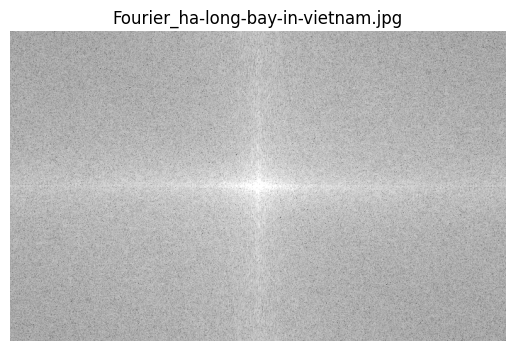

Đang áp dụng: Lowpass cho ảnh pagoda.jpg


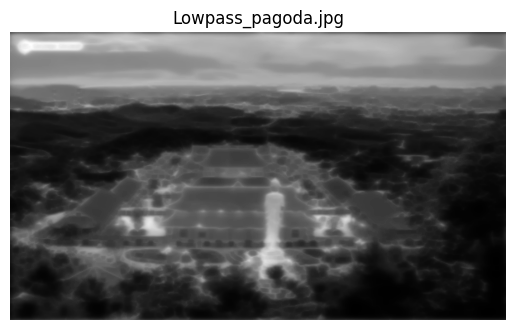

Đang áp dụng: Highpass cho ảnh quang_ninh.jpg


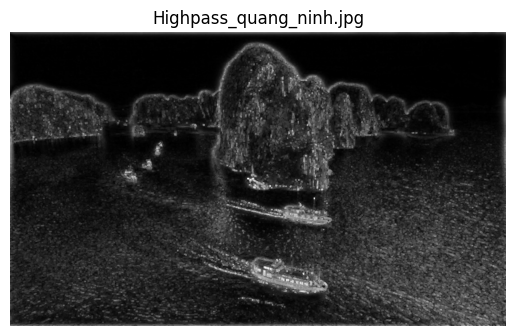

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from scipy.ndimage import minimum_filter, maximum_filter

# ==== CẤU HÌNH ====
folder = 'exercise'
output = 'output_4'
os.makedirs(output, exist_ok=True)

# FOURIER: hiển thị phổ tần số
def fast_fourier(img):
    # Biến đổi Fourier 2D
    f = np.fft.fft2(img)
    # Dịch tâm phổ (center the frequency spectrum)
    fshift = np.fft.fftshift(f)
    # Tính biên độ phổ và lấy log 
    mag = 20 * np.log(np.abs(fshift) + 1)
    # Chuyển về kiểu uint8 sau khi giới hạn giá trị trong [0,255]
    return Image.fromarray(np.clip(mag, 0, 255).astype(np.uint8))


#  LOW-PASS FILTER: làm mịn ảnh 
def butter_lowpass(img, D0=30):
    # Lấy kích thước ảnh
    r, c = img.shape
    # Tạo lưới tọa độ và dịch về tâm ảnh
    x, y = np.meshgrid(np.arange(r) - r//2, np.arange(c) - c//2, indexing='ij')
    d = np.sqrt(x**2 + y**2)  # khoảng cách tới tâm ảnh
    # Tạo mặt nạ Butterworth thông thấp bậc 2
    h = 1 / (1 + (d / D0)**2)
    # Biến đổi Fourier
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    # Áp dụng mặt nạ lọc
    fnew = fshift * h
    # Biến đổi ngược để về không gian ảnh
    inv = np.abs(np.fft.ifft2(np.fft.ifftshift(fnew)))
    # Giới hạn giá trị ảnh và làm mịn thêm bằng minimum_filter
    out = np.clip(inv, 0, 255).astype(np.uint8)
    return Image.fromarray(minimum_filter(out, size=3))


# ==== HIGH-PASS FILTER: làm sắc nét ====
def butter_highpass(img, D0=30):
    # Lấy kích thước ảnh
    r, c = img.shape
    # Tạo lưới tọa độ và dịch về tâm ảnh
    x, y = np.meshgrid(np.arange(r) - r//2, np.arange(c) - c//2, indexing='ij')
    d = np.sqrt(x**2 + y**2)  # khoảng cách tới tâm ảnh
    # Tạo mặt nạ Butterworth thông cao bậc 2
    h = 1 / (1 + (D0 / (d + 1e-8))**2)  # cộng 1e-8 để tránh chia cho 0
    # Biến đổi Fourier
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    # Áp dụng mặt nạ lọc
    fnew = fshift * h
    # Biến đổi ngược để về không gian ảnh
    inv = np.abs(np.fft.ifft2(np.fft.ifftshift(fnew)))
    # Giới hạn giá trị ảnh và làm sắc nét thêm bằng maximum_filter
    out = np.clip(inv, 0, 255).astype(np.uint8)
    return Image.fromarray(maximum_filter(out, size=3))


# DANH SÁCH HÀM VÀ NHÃN 
filters = [
    ("Fourier", fast_fourier),
    ("Lowpass", butter_lowpass),
    ("Highpass", butter_highpass)
]

# HÀM CHÍNH XỬ LÝ ẢNH 
def process_images():
    for file in os.listdir(folder):
        if not file.lower().endswith((".jpg", ".png", ".jpeg")):
            continue

        img_path = os.path.join(folder, file)
        img = Image.open(img_path).convert('RGB')

        # Đảo thứ tự màu RGB → GBR
        r, g, b = img.split()
        img = Image.merge('RGB', (g, b, r))

        gray = img.convert('L')
        gray_np = np.asarray(gray)

        # Chọn hàm lọc ngẫu nhiên
        name, func = random.choice(filters)
        print(f"Đang áp dụng: {name} cho ảnh {file}")

        result = func(gray_np)

        # Lưu và hiển thị kết quả
        save_name = f"{name}_{file}"
        result.save(os.path.join(output, save_name))

        plt.imshow(result, cmap='gray')
        plt.title(save_name)
        plt.axis('off')
        plt.show()

# CHẠY
process_images()  
